# Dynamic Time Warping (DTW) - Tutorial Completo

Dynamic Time Warping es un algoritmo para medir la similitud entre dos secuencias temporales que pueden variar en velocidad. A diferencia de la distancia euclidiana, DTW permite una alineación flexible entre las series.

## Contenido:
1. Implementación básica de DTW
2. Visualización del algoritmo
3. Comparación con distancia euclidiana
4. Aplicación práctica con datos reales
5. DTW con restricciones (ventana de Sakoe-Chiba)

In [10]:
# Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns
from scipy.spatial.distance import euclidean
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para mejores gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [11]:
def dtw_distance(x, y, distance_func=euclidean):
    """
    Calcula la distancia DTW entre dos series temporales.
    
    Parámetros:
    -----------
    x, y : array-like
        Las dos series temporales a comparar
    distance_func : función
        Función de distancia a usar (por defecto euclidiana)
    
    Retorna:
    --------
    float : distancia DTW
    """
    n, m = len(x), len(y)
    
    # Matriz de costos acumulativos
    DTW = np.full((n+1, m+1), np.inf)
    DTW[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = distance_func([x[i-1]], [y[j-1]])
            DTW[i, j] = cost + min(DTW[i-1, j],    # inserción
                                   DTW[i, j-1],    # eliminación
                                   DTW[i-1, j-1])  # coincidencia
    
    return DTW[n, m]

def dtw_path(x, y, distance_func=euclidean):
    """
    Calcula la distancia DTW y el camino óptimo.
    
    Retorna:
    --------
    tuple: (distancia, camino, matriz_DTW)
    """
    n, m = len(x), len(y)
    
    # Matriz de costos acumulativos
    DTW = np.full((n+1, m+1), np.inf)
    DTW[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = distance_func([x[i-1]], [y[j-1]])
            DTW[i, j] = cost + min(DTW[i-1, j],
                                   DTW[i, j-1],
                                   DTW[i-1, j-1])
    
    # Backtracking para encontrar el camino óptimo
    path = []
    i, j = n, m
    while i > 0 and j > 0:
        path.append((i-1, j-1))
        if DTW[i-1, j-1] <= DTW[i-1, j] and DTW[i-1, j-1] <= DTW[i, j-1]:
            i, j = i-1, j-1
        elif DTW[i-1, j] <= DTW[i, j-1]:
            i = i-1
        else:
            j = j-1
    
    path.reverse()
    return DTW[n, m], path, DTW[1:, 1:]

# Prueba básica
print("✅ Funciones DTW implementadas correctamente")

✅ Funciones DTW implementadas correctamente


Serie 1: 50 puntos
Serie 2: 60 puntos
Serie 3: 50 puntos


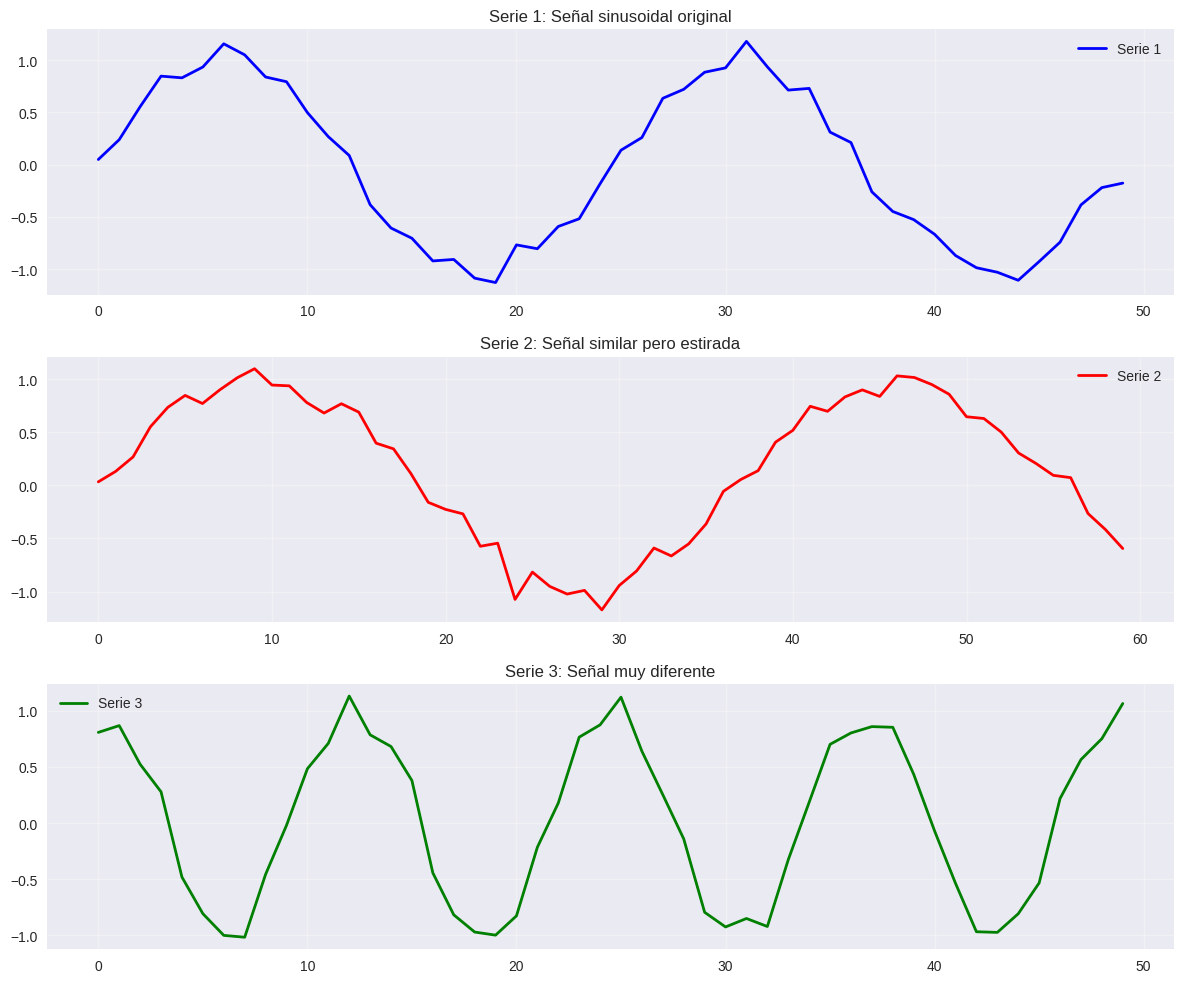

In [12]:
# Crear datos de ejemplo
np.random.seed(42)

# Serie 1: señal sinusoidal
t1 = np.linspace(0, 4*np.pi, 50)
serie1 = np.sin(t1) + 0.1 * np.random.randn(50)

# Serie 2: señal similar pero "estirada" temporalmente
t2 = np.linspace(0, 4*np.pi, 60)  # Más puntos = estirada
serie2 = np.sin(t2 * 0.8) + 0.1 * np.random.randn(60)  # Ligeramente diferente frecuencia

# Serie 3: señal muy diferente
serie3 = np.cos(t1 * 2) + 0.1 * np.random.randn(50)

print(f"Serie 1: {len(serie1)} puntos")
print(f"Serie 2: {len(serie2)} puntos") 
print(f"Serie 3: {len(serie3)} puntos")

# Visualizar las series
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(serie1, 'b-', linewidth=2, label='Serie 1')
axes[0].set_title('Serie 1: Señal sinusoidal original')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(serie2, 'r-', linewidth=2, label='Serie 2')
axes[1].set_title('Serie 2: Señal similar pero estirada')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

axes[2].plot(serie3, 'g-', linewidth=2, label='Serie 3')
axes[2].set_title('Serie 3: Señal muy diferente')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

=== COMPARACIÓN DE DISTANCIAS ===
DTW entre Serie 1 y Serie 2 (similares): 7.669
DTW entre Serie 1 y Serie 3 (diferentes): 22.165

Euclidiana entre Serie 1 y Serie 2: 8.126
Euclidiana entre Serie 1 y Serie 3: 7.310

=== INTERPRETACIÓN ===
DTW correctamente identifica que Serie 1 y 2 son más similares
Ratio DTW (diferente/similar): 2.89
Ratio Euclidiana (diferente/similar): 0.90


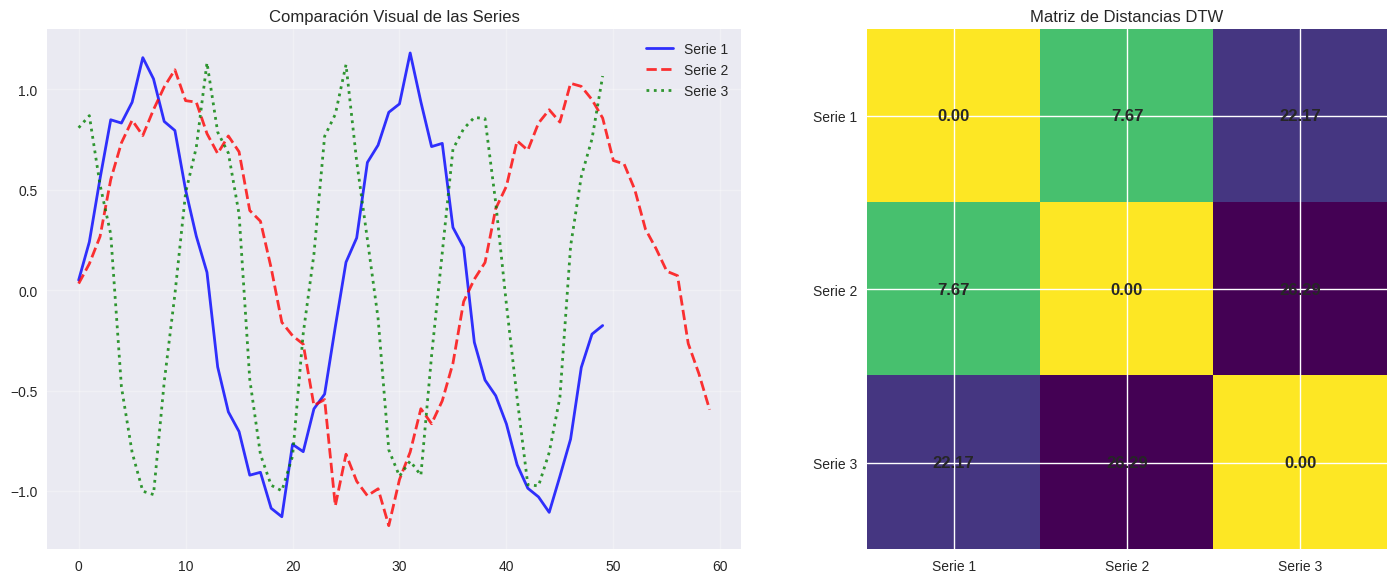

In [13]:
# Comparar DTW vs Distancia Euclidiana
def euclidean_distance(x, y):
    """Distancia euclidiana entre series (requiere misma longitud)"""
    min_len = min(len(x), len(y))
    return np.sqrt(np.sum((x[:min_len] - y[:min_len])**2))

# Calcular distancias
dtw_1_2 = dtw_distance(serie1, serie2)
dtw_1_3 = dtw_distance(serie1, serie3)

eucl_1_2 = euclidean_distance(serie1, serie2)
eucl_1_3 = euclidean_distance(serie1, serie3)

print("=== COMPARACIÓN DE DISTANCIAS ===")
print(f"DTW entre Serie 1 y Serie 2 (similares): {dtw_1_2:.3f}")
print(f"DTW entre Serie 1 y Serie 3 (diferentes): {dtw_1_3:.3f}")
print()
print(f"Euclidiana entre Serie 1 y Serie 2: {eucl_1_2:.3f}")
print(f"Euclidiana entre Serie 1 y Serie 3: {eucl_1_3:.3f}")
print()
print("=== INTERPRETACIÓN ===")
print(f"DTW correctamente identifica que Serie 1 y 2 son más similares")
print(f"Ratio DTW (diferente/similar): {dtw_1_3/dtw_1_2:.2f}")
print(f"Ratio Euclidiana (diferente/similar): {eucl_1_3/eucl_1_2:.2f}")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Series superpuestas
ax1.plot(range(len(serie1)), serie1, 'b-', linewidth=2, label='Serie 1', alpha=0.8)
ax1.plot(range(len(serie2)), serie2, 'r--', linewidth=2, label='Serie 2', alpha=0.8)
ax1.plot(range(len(serie3)), serie3, 'g:', linewidth=2, label='Serie 3', alpha=0.8)
ax1.set_title('Comparación Visual de las Series')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Matriz de distancias
distances = np.array([[0, dtw_1_2, dtw_1_3],
                     [dtw_1_2, 0, dtw_distance(serie2, serie3)],
                     [dtw_1_3, dtw_distance(serie2, serie3), 0]])

im = ax2.imshow(distances, cmap='viridis_r')
ax2.set_xticks([0, 1, 2])
ax2.set_yticks([0, 1, 2])
ax2.set_xticklabels(['Serie 1', 'Serie 2', 'Serie 3'])
ax2.set_yticklabels(['Serie 1', 'Serie 2', 'Serie 3'])
ax2.set_title('Matriz de Distancias DTW')

# Añadir valores en la matriz
for i in range(3):
    for j in range(3):
        ax2.text(j, i, f'{distances[i, j]:.2f}', 
                ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

=== ANÁLISIS DE ALINEACIÓN DTW ===


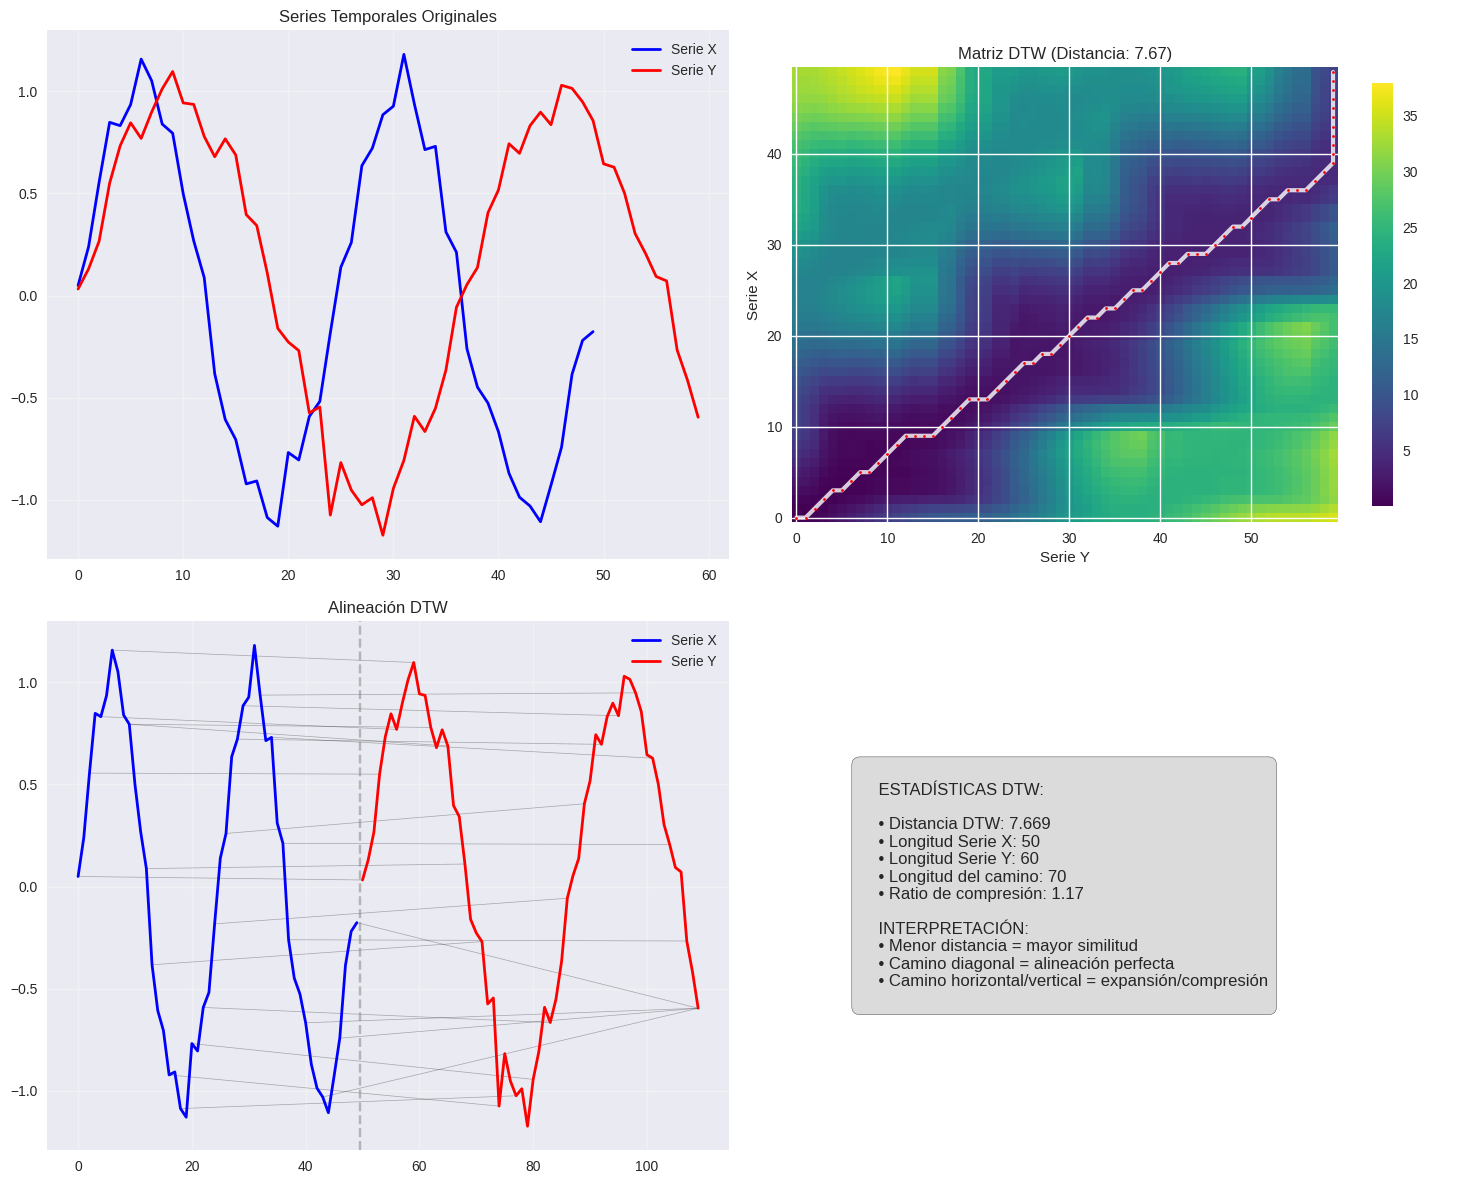

In [14]:
# Visualizar el camino óptimo de DTW
def plot_dtw_alignment(x, y, title="DTW Alignment"):
    """Visualiza la alineación DTW entre dos series"""
    distance, path, dtw_matrix = dtw_path(x, y)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Series originales
    ax1.plot(x, 'b-', linewidth=2, label='Serie X')
    ax1.plot(y, 'r-', linewidth=2, label='Serie Y')
    ax1.set_title('Series Temporales Originales')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Matriz DTW con camino
    im = ax2.imshow(dtw_matrix, cmap='viridis', origin='lower')
    ax2.set_title(f'Matriz DTW (Distancia: {distance:.2f})')
    ax2.set_xlabel('Serie Y')
    ax2.set_ylabel('Serie X')
    
    # Dibujar el camino óptimo
    path_x, path_y = zip(*path)
    ax2.plot(path_y, path_x, 'w-', linewidth=3, alpha=0.8)
    ax2.plot(path_y, path_x, 'r.', markersize=4)
    
    plt.colorbar(im, ax=ax2, shrink=0.8)
    
    # 3. Alineación de las series
    ax3.set_title('Alineación DTW')
    for i, (px, py) in enumerate(path[::max(1, len(path)//20)]):  # Mostrar cada N conexiones
        ax3.plot([px, len(x) + py], [x[px], y[py]], 'k-', alpha=0.3, linewidth=0.5)
    
    ax3.plot(range(len(x)), x, 'b-', linewidth=2, label='Serie X')
    ax3.plot(range(len(x), len(x) + len(y)), y, 'r-', linewidth=2, label='Serie Y')
    ax3.axvline(x=len(x)-0.5, color='gray', linestyle='--', alpha=0.5)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Estadísticas del camino
    ax4.axis('off')
    stats_text = f"""
    ESTADÍSTICAS DTW:
    
    • Distancia DTW: {distance:.3f}
    • Longitud Serie X: {len(x)}
    • Longitud Serie Y: {len(y)}
    • Longitud del camino: {len(path)}
    • Ratio de compresión: {len(path) / max(len(x), len(y)):.2f}
    
    INTERPRETACIÓN:
    • Menor distancia = mayor similitud
    • Camino diagonal = alineación perfecta
    • Camino horizontal/vertical = expansión/compresión
    """
    ax4.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return distance, path

# Analizar la alineación entre Serie 1 y Serie 2
print("=== ANÁLISIS DE ALINEACIÓN DTW ===")
dist_12, path_12 = plot_dtw_alignment(serie1, serie2, "DTW: Serie 1 vs Serie 2")

=== DTW CON RESTRICCIONES ===
Ventana Sin límite: Distancia = 7.669
Ventana         20: Distancia = 7.669
Ventana         10: Distancia = 21.719
Ventana          5: Distancia = inf


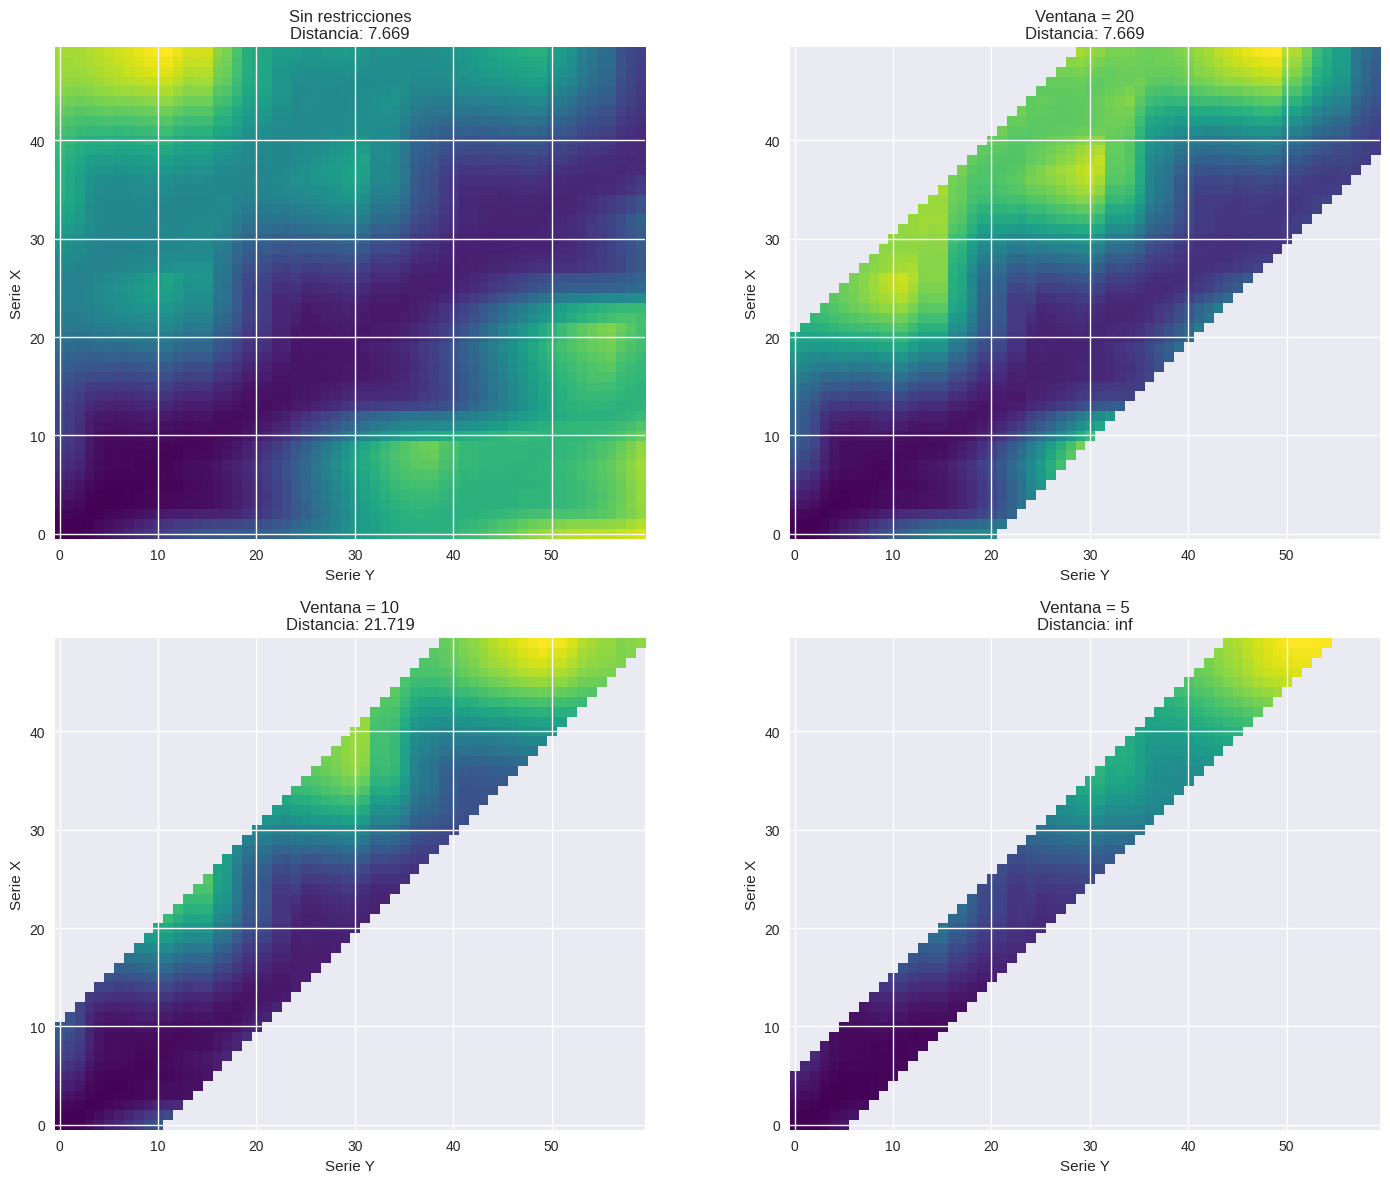


📊 A medida que reducimos la ventana:
   • Restricciones más estrictas
   • Menor flexibilidad de alineación
   • Potencialmente mayor distancia


In [15]:
# DTW con restricciones (ventana de Sakoe-Chiba)
def dtw_constrained(x, y, window=None, distance_func=euclidean):
    """
    DTW con ventana de restricción para evitar alineaciones muy distorsionadas.
    
    Parámetros:
    -----------
    window : int
        Tamaño de la ventana de Sakoe-Chiba. None = sin restricciones
    """
    n, m = len(x), len(y)
    
    if window is None:
        window = max(n, m)  # Sin restricciones
    
    DTW = np.full((n+1, m+1), np.inf)
    DTW[0, 0] = 0
    
    for i in range(1, n+1):
        # Calcular rango válido para j
        j_start = max(1, i - window)
        j_end = min(m+1, i + window + 1)
        
        for j in range(j_start, j_end):
            cost = distance_func([x[i-1]], [y[j-1]])
            DTW[i, j] = cost + min(DTW[i-1, j],
                                   DTW[i, j-1],
                                   DTW[i-1, j-1])
    
    return DTW[n, m]

# Comparar DTW con y sin restricciones
print("=== DTW CON RESTRICCIONES ===")

windows = [None, 20, 10, 5]
results = []

for window in windows:
    dist = dtw_constrained(serie1, serie2, window)
    results.append(dist)
    window_str = "Sin límite" if window is None else f"{window}"
    print(f"Ventana {window_str:>10}: Distancia = {dist:.3f}")

# Visualizar el efecto de las restricciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, window in enumerate(windows):
    ax = axes[idx]
    
    # Calcular matriz DTW
    n, m = len(serie1), len(serie2)
    DTW = np.full((n+1, m+1), np.inf)
    DTW[0, 0] = 0
    
    if window is None:
        window_calc = max(n, m)
    else:
        window_calc = window
    
    for i in range(1, n+1):
        j_start = max(1, i - window_calc)
        j_end = min(m+1, i + window_calc + 1)
        
        for j in range(j_start, j_end):
            cost = euclidean([serie1[i-1]], [serie2[j-1]])
            DTW[i, j] = cost + min(DTW[i-1, j],
                                   DTW[i, j-1],
                                   DTW[i-1, j-1])
    
    # Crear máscara para visualizar área válida
    mask = np.full((n, m), True)
    for i in range(n):
        j_start = max(0, i - window_calc)
        j_end = min(m, i + window_calc + 1)
        mask[i, j_start:j_end] = False
    
    # Plotear
    dtw_vis = DTW[1:, 1:].copy()
    dtw_vis[mask] = np.nan
    
    im = ax.imshow(dtw_vis, cmap='viridis', origin='lower')
    
    window_title = "Sin restricciones" if window is None else f"Ventana = {window}"
    ax.set_title(f'{window_title}\nDistancia: {results[idx]:.3f}')
    ax.set_xlabel('Serie Y')
    ax.set_ylabel('Serie X')

plt.tight_layout()
plt.show()

print(f"\n📊 A medida que reducimos la ventana:")
print(f"   • Restricciones más estrictas")
print(f"   • Menor flexibilidad de alineación")
print(f"   • Potencialmente mayor distancia")

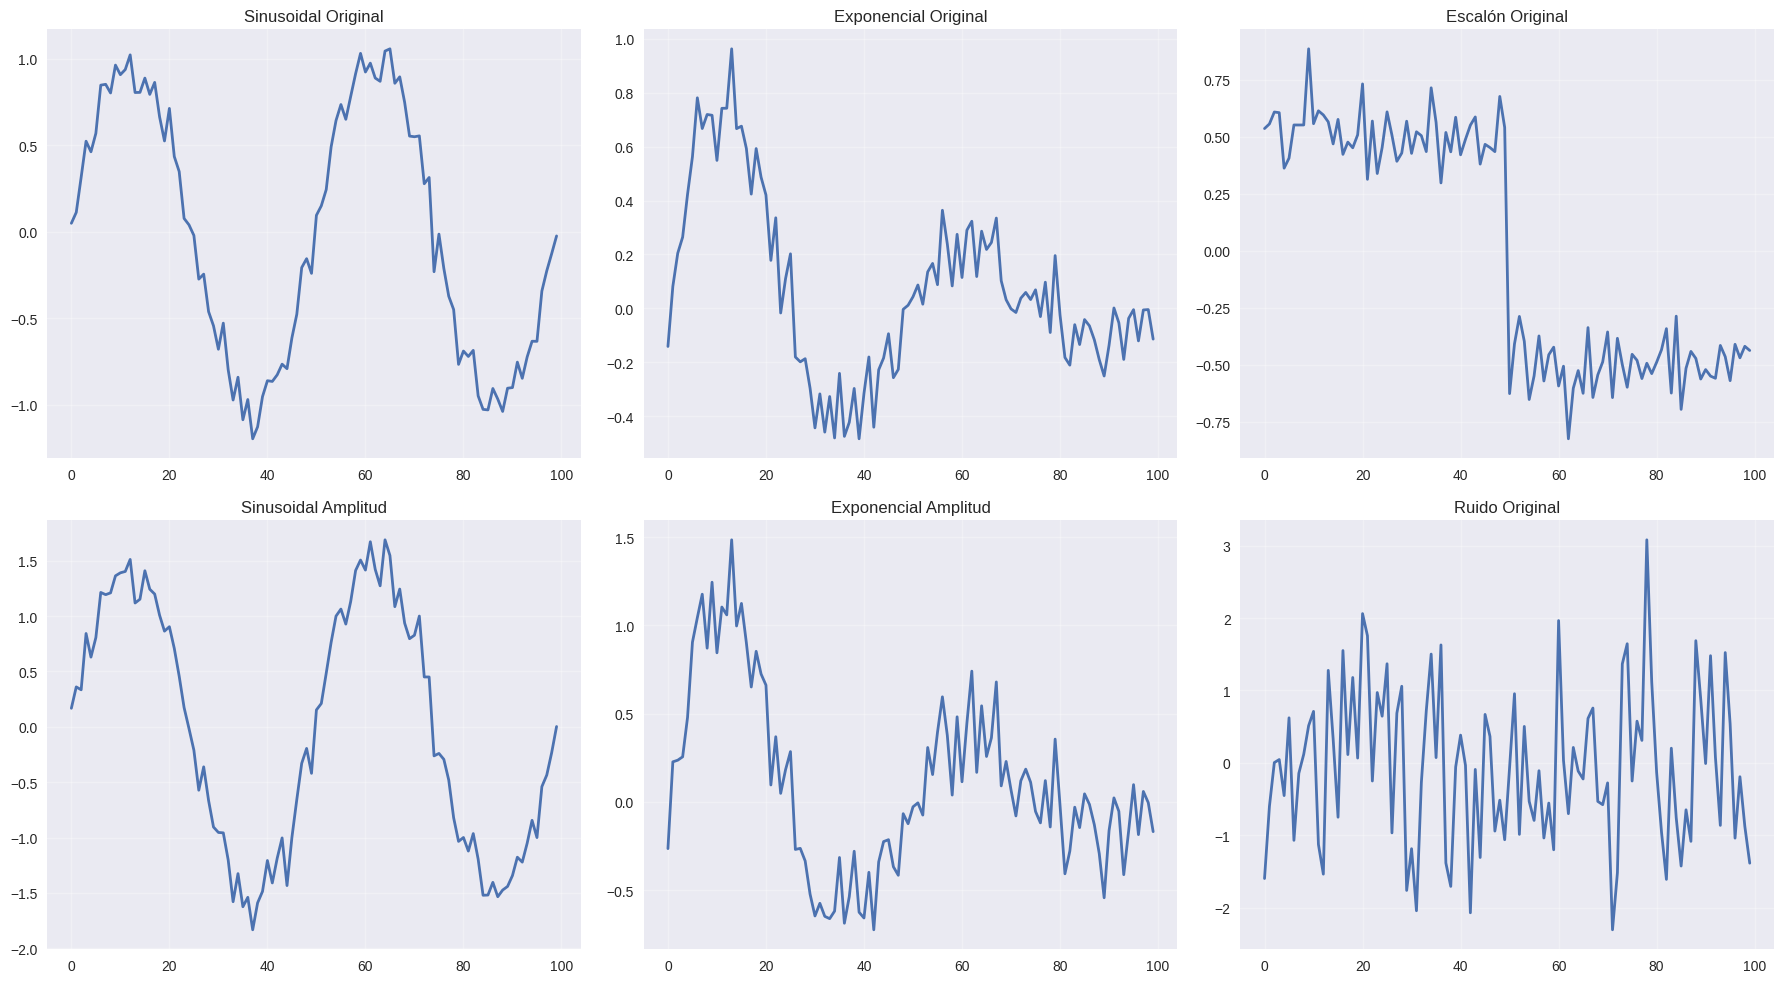

✅ Patrones generados para análisis DTW


In [16]:
# Aplicación práctica: DTW para clustering de series temporales
def generate_time_series_patterns():
    """Genera diferentes patrones de series temporales"""
    np.random.seed(42)
    t = np.linspace(0, 4*np.pi, 100)
    
    patterns = {
        'Sinusoidal': np.sin(t) + 0.1 * np.random.randn(100),
        'Exponencial': np.exp(-t/5) * np.sin(t) + 0.1 * np.random.randn(100),
        'Escalón': np.where(t < 2*np.pi, 0.5, -0.5) + 0.1 * np.random.randn(100),
        'Triangular': 2 * np.arcsin(np.sin(t)) + 0.1 * np.random.randn(100),
        'Ruido': np.random.randn(100)
    }
    
    # Crear variaciones de cada patrón
    variations = {}
    for name, pattern in patterns.items():
        # Variación 1: mismo patrón con diferente amplitud
        var1 = pattern * 1.5 + 0.1 * np.random.randn(100)
        # Variación 2: mismo patrón desplazado temporalmente
        var2 = np.roll(pattern, 10) + 0.1 * np.random.randn(100)
        
        variations[f'{name}_original'] = pattern
        variations[f'{name}_amplitud'] = var1
        variations[f'{name}_desplazado'] = var2
    
    return variations

# Generar patrones
patterns = generate_time_series_patterns()

# Visualizar algunos patrones
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

selected_patterns = ['Sinusoidal_original', 'Exponencial_original', 'Escalón_original',
                    'Sinusoidal_amplitud', 'Exponencial_amplitud', 'Ruido_original']

for idx, pattern_name in enumerate(selected_patterns):
    axes[idx].plot(patterns[pattern_name], linewidth=2)
    axes[idx].set_title(pattern_name.replace('_', ' ').title())
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Patrones generados para análisis DTW")

Calculando matriz de distancias DTW...


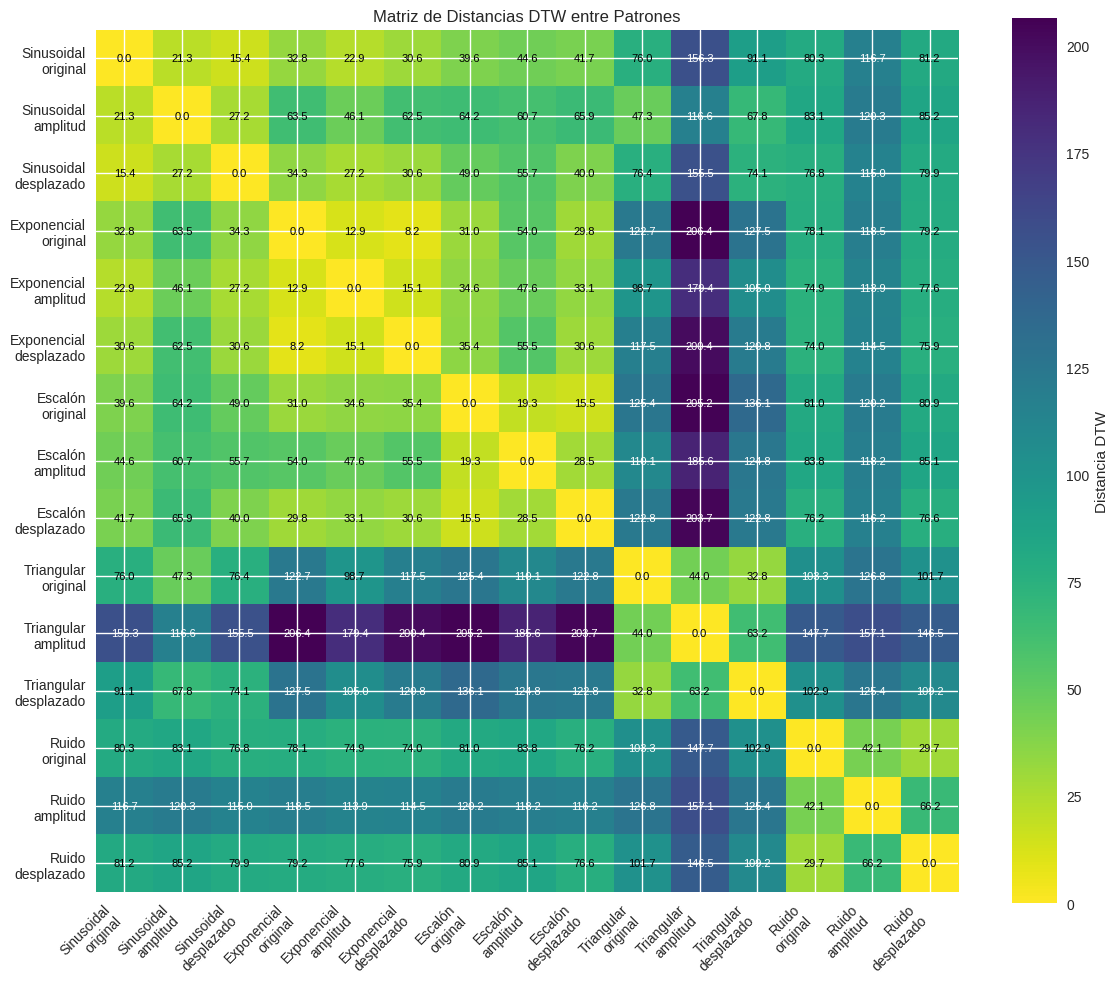

=== PATRONES MÁS SIMILARES (DTW) ===

🔍 Sinusoidal_original:
   1. Sinusoidal_desplazado (distancia: 15.37)
   2. Sinusoidal_amplitud (distancia: 21.32)
   3. Exponencial_amplitud (distancia: 22.90)

🔍 Sinusoidal_amplitud:
   1. Sinusoidal_original (distancia: 21.32)
   2. Sinusoidal_desplazado (distancia: 27.24)
   3. Exponencial_amplitud (distancia: 46.11)

🔍 Sinusoidal_desplazado:
   1. Sinusoidal_original (distancia: 15.37)
   2. Exponencial_amplitud (distancia: 27.19)
   3. Sinusoidal_amplitud (distancia: 27.24)

🔍 Exponencial_original:
   1. Exponencial_desplazado (distancia: 8.23)
   2. Exponencial_amplitud (distancia: 12.88)
   3. Escalón_desplazado (distancia: 29.76)

🔍 Exponencial_amplitud:
   1. Exponencial_original (distancia: 12.88)
   2. Exponencial_desplazado (distancia: 15.14)
   3. Sinusoidal_original (distancia: 22.90)

🔍 Exponencial_desplazado:
   1. Exponencial_original (distancia: 8.23)
   2. Exponencial_amplitud (distancia: 15.14)
   3. Escalón_desplazado (distanc

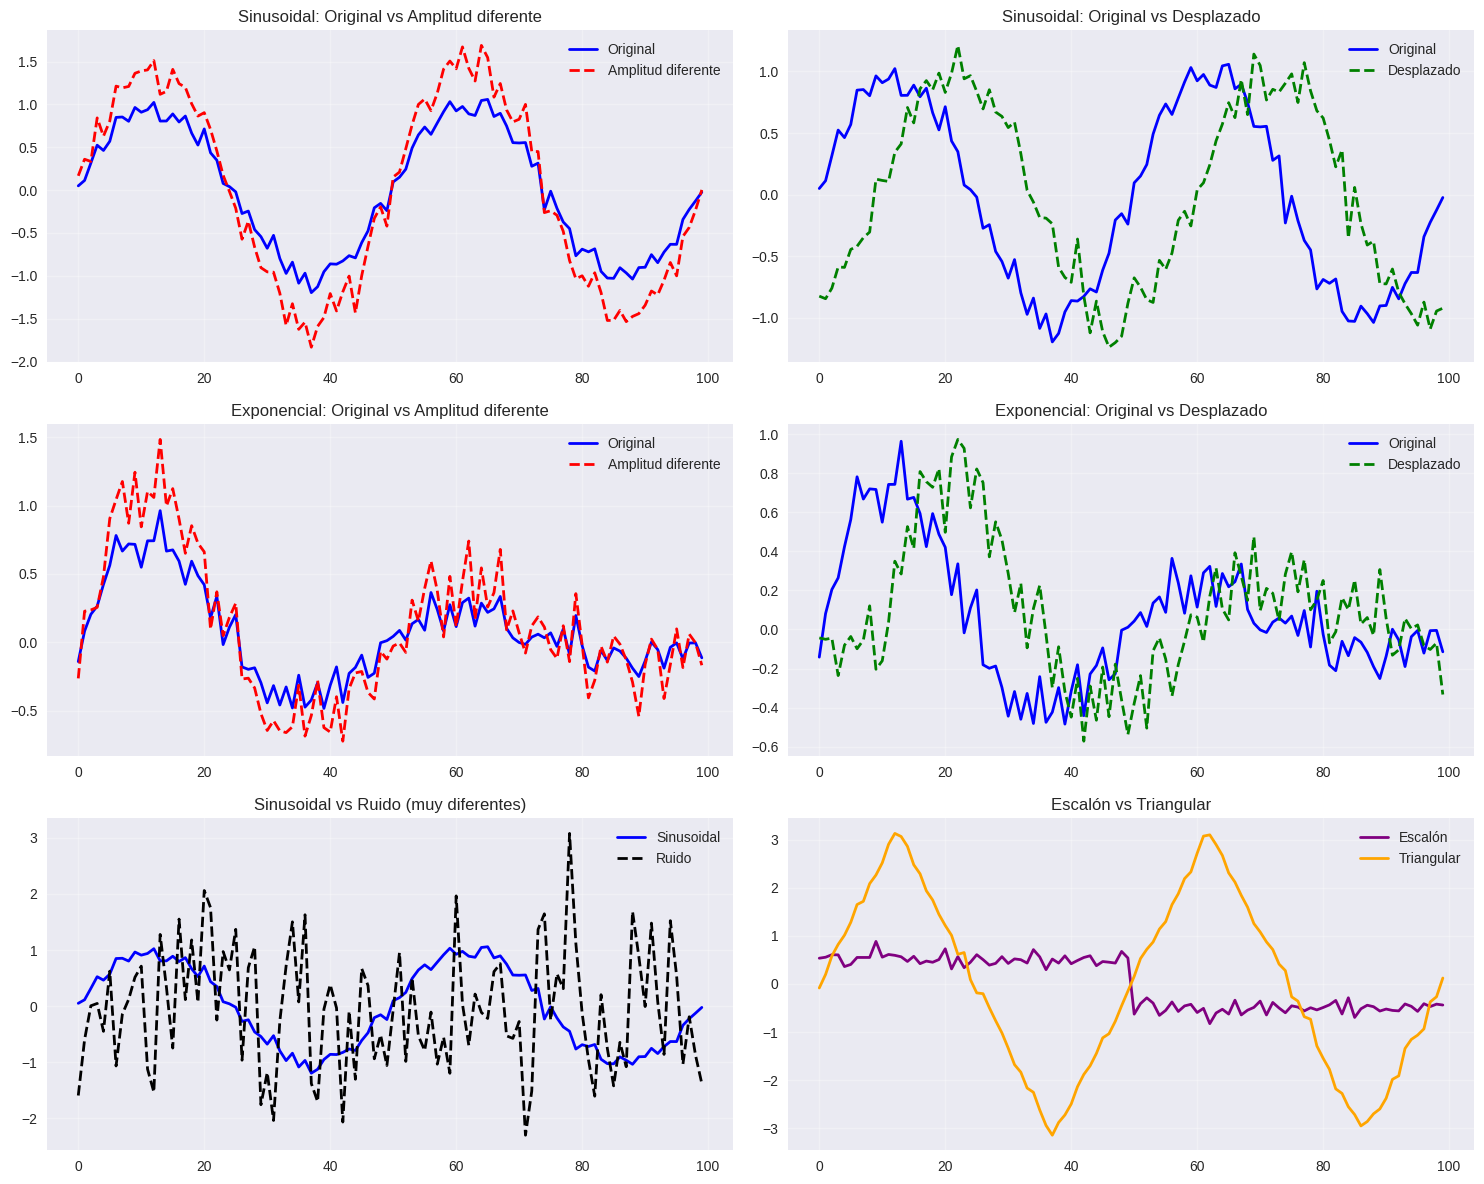

In [17]:
# Crear matriz de distancias DTW entre todos los patrones
pattern_names = list(patterns.keys())
n_patterns = len(pattern_names)

print("Calculando matriz de distancias DTW...")
distance_matrix = np.zeros((n_patterns, n_patterns))

for i in range(n_patterns):
    for j in range(i, n_patterns):
        if i == j:
            distance_matrix[i, j] = 0
        else:
            dist = dtw_distance(patterns[pattern_names[i]], patterns[pattern_names[j]])
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist  # Simétrica

# Visualizar matriz de distancias
plt.figure(figsize=(12, 10))
im = plt.imshow(distance_matrix, cmap='viridis_r')
plt.colorbar(im, label='Distancia DTW')
plt.title('Matriz de Distancias DTW entre Patrones')

# Añadir etiquetas
tick_labels = [name.replace('_', '\n') for name in pattern_names]
plt.xticks(range(n_patterns), tick_labels, rotation=45, ha='right')
plt.yticks(range(n_patterns), tick_labels)

# Añadir valores en las celdas
for i in range(n_patterns):
    for j in range(n_patterns):
        plt.text(j, i, f'{distance_matrix[i, j]:.1f}', 
                ha='center', va='center', fontsize=8,
                color='white' if distance_matrix[i, j] > distance_matrix.max()/2 else 'black')

plt.tight_layout()
plt.show()

# Análisis de clustering simple basado en DTW
def find_most_similar_patterns(distance_matrix, pattern_names, top_k=3):
    """Encuentra los patrones más similares basándose en DTW"""
    results = {}
    
    for i, pattern in enumerate(pattern_names):
        # Obtener distancias para este patrón (excluyendo a sí mismo)
        distances = distance_matrix[i].copy()
        distances[i] = np.inf  # Excluir autocomparación
        
        # Encontrar los k más similares
        similar_indices = np.argsort(distances)[:top_k]
        similar_patterns = [(pattern_names[idx], distances[idx]) for idx in similar_indices]
        results[pattern] = similar_patterns
    
    return results

# Encontrar patrones similares
similar_patterns = find_most_similar_patterns(distance_matrix, pattern_names)

print("=== PATRONES MÁS SIMILARES (DTW) ===")
for pattern, similares in similar_patterns.items():
    print(f"\n🔍 {pattern}:")
    for i, (sim_pattern, dist) in enumerate(similares, 1):
        print(f"   {i}. {sim_pattern} (distancia: {dist:.2f})")

# Visualizar algunos casos interesantes
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Caso 1: Sinusoidal original vs sus variaciones
axes[0, 0].plot(patterns['Sinusoidal_original'], 'b-', linewidth=2, label='Original')
axes[0, 0].plot(patterns['Sinusoidal_amplitud'], 'r--', linewidth=2, label='Amplitud diferente')
axes[0, 0].set_title('Sinusoidal: Original vs Amplitud diferente')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(patterns['Sinusoidal_original'], 'b-', linewidth=2, label='Original')
axes[0, 1].plot(patterns['Sinusoidal_desplazado'], 'g--', linewidth=2, label='Desplazado')
axes[0, 1].set_title('Sinusoidal: Original vs Desplazado')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Caso 2: Exponencial
axes[1, 0].plot(patterns['Exponencial_original'], 'b-', linewidth=2, label='Original')
axes[1, 0].plot(patterns['Exponencial_amplitud'], 'r--', linewidth=2, label='Amplitud diferente')
axes[1, 0].set_title('Exponencial: Original vs Amplitud diferente')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(patterns['Exponencial_original'], 'b-', linewidth=2, label='Original')
axes[1, 1].plot(patterns['Exponencial_desplazado'], 'g--', linewidth=2, label='Desplazado')
axes[1, 1].set_title('Exponencial: Original vs Desplazado')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Caso 3: Comparación entre diferentes tipos
axes[2, 0].plot(patterns['Sinusoidal_original'], 'b-', linewidth=2, label='Sinusoidal')
axes[2, 0].plot(patterns['Ruido_original'], 'k--', linewidth=2, label='Ruido')
axes[2, 0].set_title('Sinusoidal vs Ruido (muy diferentes)')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].plot(patterns['Escalón_original'], 'purple', linewidth=2, label='Escalón')
axes[2, 1].plot(patterns['Triangular_original'], 'orange', linewidth=2, label='Triangular')
axes[2, 1].set_title('Escalón vs Triangular')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== BENCHMARK DE RENDIMIENTO ===
Tamaño	DTW Completo   	DTW con ventana=10	FastDTW Aprox  
50	0.0077s	0.0027s	0.0074s
100	0.0298s	0.0059s	0.0072s
200	0.1155s	0.0118s	0.0072s
500	0.7325s	0.0316s	0.0072s


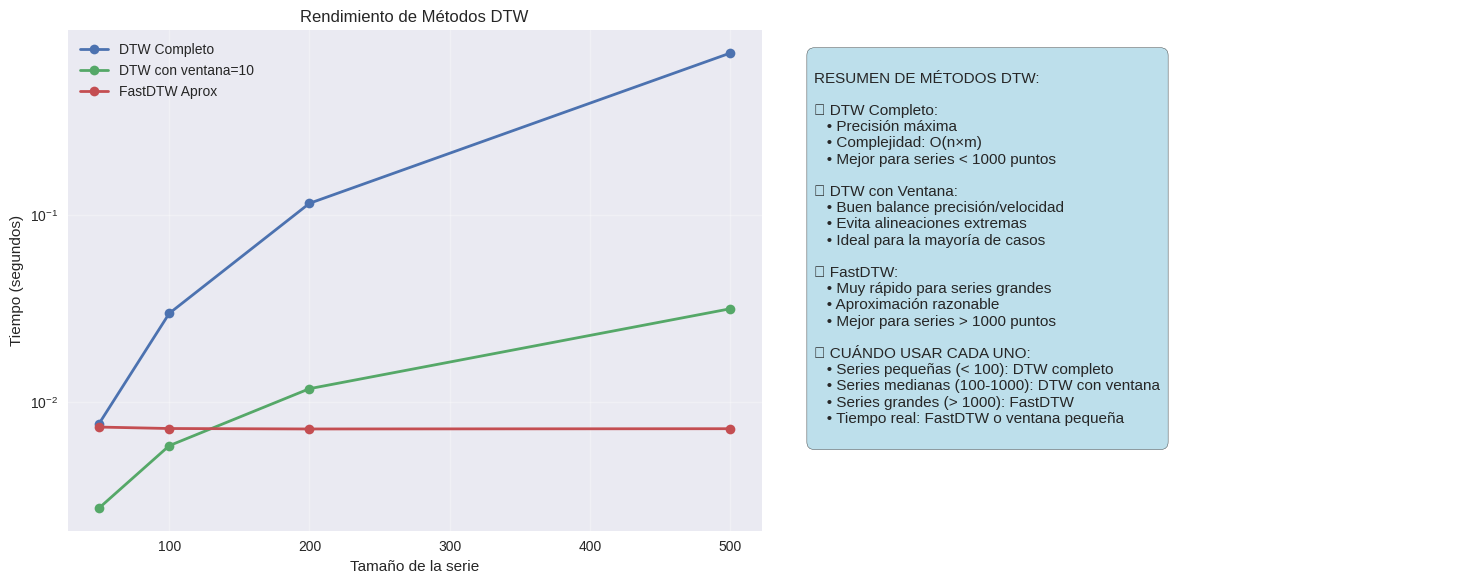

In [18]:
# Optimizaciones y alternativas de DTW
def fastdtw_approximation(x, y, radius=1):
    """
    Aproximación FastDTW para series más largas.
    Esta es una implementación simplificada del concepto.
    """
    if len(x) < 100 and len(y) < 100:
        # Para series pequeñas, usar DTW completo
        return dtw_distance(x, y)
    
    # Para series grandes, usar submuestreo
    factor = max(len(x), len(y)) // 50
    x_sub = x[::factor]
    y_sub = y[::factor]
    
    return dtw_distance(x_sub, y_sub) * factor

# Benchmark de rendimiento
import time

def benchmark_dtw_methods():
    """Compara diferentes métodos DTW en términos de velocidad"""
    sizes = [50, 100, 200, 500]
    methods = {
        'DTW Completo': dtw_distance,
        'DTW con ventana=10': lambda x, y: dtw_constrained(x, y, window=10),
        'FastDTW Aprox': fastdtw_approximation
    }
    
    results = {method: [] for method in methods}
    
    print("=== BENCHMARK DE RENDIMIENTO ===")
    print("Tamaño\t" + "\t".join(f"{method:<15}" for method in methods))
    
    for size in sizes:
        # Generar series de prueba
        x = np.random.randn(size)
        y = np.random.randn(size)
        
        row = [f"{size}"]
        
        for method_name, method_func in methods.items():
            start_time = time.time()
            try:
                _ = method_func(x, y)
                elapsed = time.time() - start_time
                results[method_name].append(elapsed)
                row.append(f"{elapsed:.4f}s")
            except Exception as e:
                results[method_name].append(np.nan)
                row.append("Error")
        
        print("\t".join(row))
    
    return results

# Ejecutar benchmark
benchmark_results = benchmark_dtw_methods()

# Visualizar resultados del benchmark
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de tiempos
sizes = [50, 100, 200, 500]
for method, times in benchmark_results.items():
    valid_times = [t for t in times if not np.isnan(t)]
    valid_sizes = sizes[:len(valid_times)]
    ax1.plot(valid_sizes, valid_times, 'o-', linewidth=2, label=method)

ax1.set_xlabel('Tamaño de la serie')
ax1.set_ylabel('Tiempo (segundos)')
ax1.set_title('Rendimiento de Métodos DTW')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Resumen de características
ax2.axis('off')
summary_text = """
RESUMEN DE MÉTODOS DTW:

🔹 DTW Completo:
   • Precisión máxima
   • Complejidad: O(n×m)
   • Mejor para series < 1000 puntos

🔹 DTW con Ventana:
   • Buen balance precisión/velocidad
   • Evita alineaciones extremas
   • Ideal para la mayoría de casos

🔹 FastDTW:
   • Muy rápido para series grandes
   • Aproximación razonable
   • Mejor para series > 1000 puntos

📊 CUÁNDO USAR CADA UNO:
   • Series pequeñas (< 100): DTW completo
   • Series medianas (100-1000): DTW con ventana
   • Series grandes (> 1000): FastDTW
   • Tiempo real: FastDTW o ventana pequeña
"""

ax2.text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

In [19]:
# Ejemplo con librería externa (opcional)
print("=== LIBRERÍAS EXTERNAS PARA DTW ===")
print("""
Para uso en producción, considera estas librerías especializadas:

📦 dtaidistance:
   pip install dtaidistance
   - Implementación en C muy rápida
   - Soporte para matrices de distancia
   - Visualizaciones integradas

📦 tslearn:
   pip install tslearn
   - Suite completa para ML con series temporales
   - DTW, clustering, clasificación
   - Integración con scikit-learn

📦 fastdtw:
   pip install fastdtw
   - Implementación del algoritmo FastDTW
   - Ideal para series muy largas

Ejemplo de uso con dtaidistance:
```python
from dtaidistance import dtw
distance = dtw.distance(serie1, serie2)
```
""")

# Conclusiones y casos de uso
print("\n" + "="*60)
print("🎯 CONCLUSIONES Y CASOS DE USO")
print("="*60)

conclusion_text = """
VENTAJAS de DTW:
✅ Maneja series de diferentes longitudes
✅ Robusto a distorsiones temporales
✅ No requiere preprocesamiento específico
✅ Interpretable y explicable
✅ Funciona bien con patrones similares

DESVENTAJAS de DTW:
❌ Complejidad computacional O(n²)
❌ Sensible al ruido
❌ Puede ser lento para series muy largas
❌ Requiere ajuste de parámetros (ventana)

CASOS DE USO IDEALES:
🎵 Reconocimiento de audio y voz
📈 Análisis de patrones financieros
🏃 Análisis de movimiento y gestos
🧬 Secuencias biológicas
📊 Clustering de series temporales
🤖 Clasificación de comportamientos

ALTERNATIVAS A CONSIDERAR:
• Correlación cruzada (series estacionarias)
• Distancia euclidiana (misma longitud)
• Earth Mover's Distance
• Frechet Distance
• Shape-based distances
"""

print(conclusion_text)

# Ejemplo final: DTW en el contexto de tus datos
print("\n" + "="*60)
print("💡 APLICACIÓN A TUS DATOS DE LABORATORIO")
print("="*60)

application_text = """
Basándome en tu workspace con datos de ventas y predicciones:

🔍 POSIBLES APLICACIONES DTW:

1. COMPARACIÓN DE PATRONES DE VENTAS:
   • Identificar productos con comportamientos similares
   • Agrupar productos para pronósticos conjuntos
   • Detectar patrones estacionales comunes

2. EVALUACIÓN DE MODELOS:
   • Comparar predicciones vs valores reales
   • Evaluar similitud de patrones (no solo MAE/RMSE)
   • Validar consistencia temporal de predicciones

3. CLUSTERING DE SERIES TEMPORALES:
   • Agrupar productos por patrones de demanda
   • Identificar familias de productos similares
   • Segmentación automática para modelos específicos

4. DETECCIÓN DE ANOMALÍAS:
   • Identificar comportamientos atípicos
   • Detectar cambios de patrón en ventas
   • Validar calidad de pronósticos

💻 PRÓXIMOS PASOS:
   • Cargar tus datos de ventas
   • Aplicar DTW para clustering
   • Comparar con métodos tradicionales
   • Integrar en pipeline de ML
"""

print(application_text)

print("\n🎉 ¡Tutorial DTW completado! ")
print("📝 Ahora tienes una comprensión completa de Dynamic Time Warping")
print("🚀 ¿Quieres aplicarlo a tus datos específicos?")

=== LIBRERÍAS EXTERNAS PARA DTW ===

Para uso en producción, considera estas librerías especializadas:

📦 dtaidistance:
   pip install dtaidistance
   - Implementación en C muy rápida
   - Soporte para matrices de distancia
   - Visualizaciones integradas

📦 tslearn:
   pip install tslearn
   - Suite completa para ML con series temporales
   - DTW, clustering, clasificación
   - Integración con scikit-learn

📦 fastdtw:
   pip install fastdtw
   - Implementación del algoritmo FastDTW
   - Ideal para series muy largas

Ejemplo de uso con dtaidistance:
```python
from dtaidistance import dtw
distance = dtw.distance(serie1, serie2)
```


🎯 CONCLUSIONES Y CASOS DE USO

VENTAJAS de DTW:
✅ Maneja series de diferentes longitudes
✅ Robusto a distorsiones temporales
✅ No requiere preprocesamiento específico
✅ Interpretable y explicable
✅ Funciona bien con patrones similares

DESVENTAJAS de DTW:
❌ Complejidad computacional O(n²)
❌ Sensible al ruido
❌ Puede ser lento para series muy largas
❌ Requie